In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [178]:
data = pd.read_csv (r'/content/titanic.csv')
# data.info()
# data.dropna(inplace=True) #dropping na values

In [179]:
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


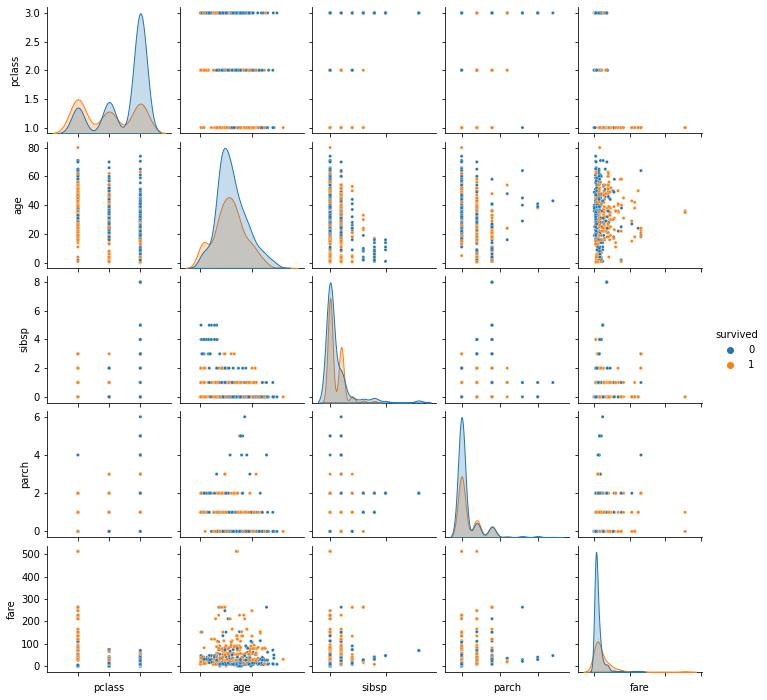

In [181]:
# import libraries to help visualize data
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


g = sns.pairplot(data=data, hue='survived',
                 height=2,diag_kind = 'kde',plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [182]:
data.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [183]:
def cabin_to_level(cabin):
    cabin=str(cabin)
    if(cabin=='nan'):
        return "nan"
    else:
        return cabin[0]

data['Level']=data['cabin'].apply(cabin_to_level)


In [184]:
data['Level'].value_counts()

nan    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Level, dtype: int64

In [185]:
survivedtrue = data[(data['survived']==1)]
print(survivedtrue['Level'].value_counts())
data['embarked'].value_counts()

nan    206
B       35
C       35
D       25
E       24
F        8
A        7
G        2
Name: Level, dtype: int64


S    644
C    168
Q     77
Name: embarked, dtype: int64

In [186]:
# As C is the most frequent deck, converting the nan values to C in order to not lose data.
level_frequent = 'C'
def nan_level(cabin):
    cabin=str(cabin)
    if(cabin=='nan'):
        return level_frequent
    else:
      return cabin

data['Level']=data['Level'].apply(nan_level)
# Replacing two missing embarked values with S

def nan_embarked(embarked):
    embarked=str(embarked)
    if(embarked=='nan'):
        return 'S'
    else:
      return embarked

data['Level']=data['Level'].apply(nan_level)
data['embarked']=data['embarked'].apply(nan_embarked)




In [187]:
print(data['embarked'].value_counts())
data['Level'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64


C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Level, dtype: int64

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  891 non-null    object 
 11  Level     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [189]:
data = data.drop(labels ='cabin', axis = 1)

In [190]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   embarked  891 non-null    object 
 10  Level     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
(891, 11)


In [191]:
data = data.dropna()
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     714 non-null    int64  
 6   parch     714 non-null    int64  
 7   ticket    714 non-null    object 
 8   fare      714 non-null    float64
 9   embarked  714 non-null    object 
 10  Level     714 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.9+ KB
(714, 11)


In [192]:
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,Level
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,C
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C


In [193]:
#Family members as siblings/spouses + parents/children
data['Fam']=data['sibsp']+data['parch']

In [194]:
# To differentiate married and unmarried
def display_names(name):
    title=name.split(',')[1].split('.')[0].strip()
    return title.strip()
data['name'].apply(display_names).unique()



array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [195]:
data['Prefix'] = data['name'].apply(display_names)

def sort(prefix):
    if prefix in ['Don', 'Major', 'Jonkheer','Sir', 'Dr', 'Capt', 'Rev', 'Col', 'the Countess', 'Mme', 'Lady', 'Mr', 'Mrs']:
        return 'Married'
    elif prefix in ['Mlle', 'Ms', 'Master', 'Miss']:
        return 'Unmarried'

data['marital status']=data['Prefix'].apply(sort)

In [196]:
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,Level,Fam,Prefix,marital status
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,C,1,Mr,Married
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,Mrs,Married
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,C,0,Miss,Unmarried
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,1,Mrs,Married
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,C,0,Mr,Married


In [197]:
final_data=data.drop(columns=['name','ticket', 'sibsp','parch', 'Prefix'])
final_data.head()

,survived,pclass,sex,age,fare,embarked,Level,Fam,marital status
0,0,3,male,22.0,7.2500,S,C,1,Married
1,1,1,female,38.0,71.2833,C,C,1,Married
2,1,3,female,26.0,7.9250,S,C,0,Unmarried
3,1,1,female,35.0,53.1000,S,C,1,Married
4,0,3,male,35.0,8.0500,S,C,0,Married


In [198]:
X=final_data.drop(columns=['survived'])
Y=final_data['survived']

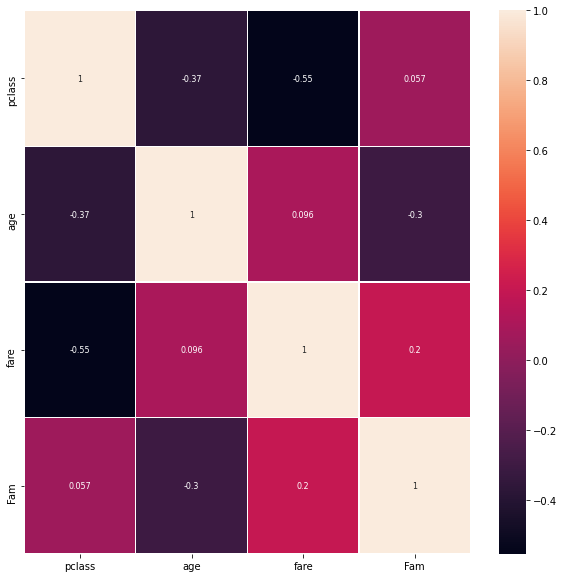

In [199]:
sns.heatmap(X.corr(),annot=True,linewidths=0.2,annot_kws={'size':8})
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [200]:
X_cat = pd.get_dummies(X, columns = ["sex", "embarked", "Level", "marital status"],
                             prefix=["sex", "embarked", "Level", "marital status"])
Y = pd.get_dummies(Y, columns = ['survived'], prefix = ['survived'])

In [201]:
print(Y.shape)
X_cat.head()


(714, 2)


,pclass,age,fare,Fam,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,Level_A,Level_B,Level_C,Level_D,Level_E,Level_F,Level_G,Level_T,marital status_Married,marital status_Unmarried
0,3,22.0,7.2500,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,1,38.0,71.2833,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,3,26.0,7.9250,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,3,35.0,8.0500,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [202]:
X_cat = X_cat.to_numpy()
Y = Y.to_numpy()

In [203]:
x_train,x_test,y_train,y_test=train_test_split(X_cat, Y,test_size=0.1,random_state=123)

In [216]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

class MyNN:
    def __init__(self, x, y, lr):
        self.x = x
        neurons = 128
        self.lr = lr
        ip_dim = x.shape[1]
        op_dim = 2

        self.w1 = np.random.randn(ip_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y
        self.loss=0
    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = tanh(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = tanh(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = softmax(z3)
        
    def backprop(self):
        self.loss = error(self.a3, self.y)
        # print('Error :', loss)
        a3_delta = cross_entropy(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * tanh_prime(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * tanh_prime(self.a1) # w1

        self.w3 = self.w3-self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 = self.b3-self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 = self.w2-self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 = self.b2-self.lr * np.sum(a2_delta, axis=0)
        self.w1 = self.w1-self.lr * np.dot(self.x.T, a1_delta)
        self.b1 = self.b1-self.lr * np.sum(a1_delta, axis=0)

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()


In [231]:
lr = 0.0001
model = MyNN(x_train, y_train, lr)

epochs = 20000
cost = []

for x in range(epochs):
    model.feedforward()
    cost.append(model.loss)
    if x%1000==0:
      print(f'{x:5d}\t{model.loss}')
    model.backprop()
		
def get_acc(x, y):
    acc = 0
    for xx,yy in zip(x, y):
        s = model.predict(xx)
        if s == np.argmax(yy):
            acc=acc+1
    return acc/len(x)*100
	
print("Training accuracy : ", get_acc(x_train, y_train))
# print("Test accuracy : ", get_acc(x_val/16, np.array(y_val)))


    0	0
 1000	1.409080530437767
 2000	1.1660174200635318
 3000	1.0118741677912482
 4000	0.9361690416238055
 5000	0.8999408331133563
 6000	1.1463573872315571
 7000	1.0478847838005574
 8000	0.9685921214844906
 9000	0.959169642777198
10000	0.999784488728246
11000	0.9558756498653926
12000	0.7962387075782171
13000	0.8263911898870023
14000	0.8509759124257417
15000	0.8239796440894538
16000	0.822150914558801
17000	0.8460447499998943
18000	0.9393140180400693
19000	0.9442591276888141
Training accuracy :  76.63551401869158


In [232]:
print("Test accuracy : ", get_acc(x_test, y_test))

Test accuracy :  68.05555555555556
